<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Overview](#1)
2.	[Importing Libraries and Reading the Dataset ](#2)
3.	[Data Preprocessing and Visualization](#3)
4. [Regression Models](#4)
   - 4.1 [Linear Regression](#4.1)
       - 4.1.1 [The Line of Best Fit ](#4.1.1)
       - 4.1.2 [The cost Function](#4.1.2)
       - 4.1.3 [Gradient Descent](#4.1.3)
       - 4.1.4 [Using Linear Regression for Prediction](#4.1.4)
       - 4.1.5 [Evaluating your Model – R square and adjusted R- square](#4.1.5)
   - 4.2 [Polynomial Regression](#4.2)
   - 4.3 [Regularization](#4.3)
       - 4.3.1 [Ridge Regression](#4.3.1)
       - 4.3.2 [Lasso regression](#4.3.2)

## 1. Overview <a class="anchor" id="1"></a>
Columns:

+ Age: Age in years
+ KM: Accumulated Kilometers on odometer
+ FuelType: Fuel Type (Petrol, Diesel, CNG)
+ HP: Horse Power
+ MetColor: Metallic Color? (Yes=1, No=0)
+ Automatic: Automatic ( (Yes=1, No=0)
+ CC: Cylinder Volume in cubic centimeters
+ Doors: Number of doors
+ Weight: Weight in Kilograms
+ Price: Offer Price in EUROs

### 2. Importing Libraries and Reading the Dataset <a class="anchor" id="2"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('Toyota_Kagle.csv')
dataset.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [3]:
dataset.count()

Price        1436
Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
dtype: int64

In [4]:
dataset.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


### 3. Data Preprocessing and Visualization <a class="anchor" id="3"></a>

In [5]:
dataset.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

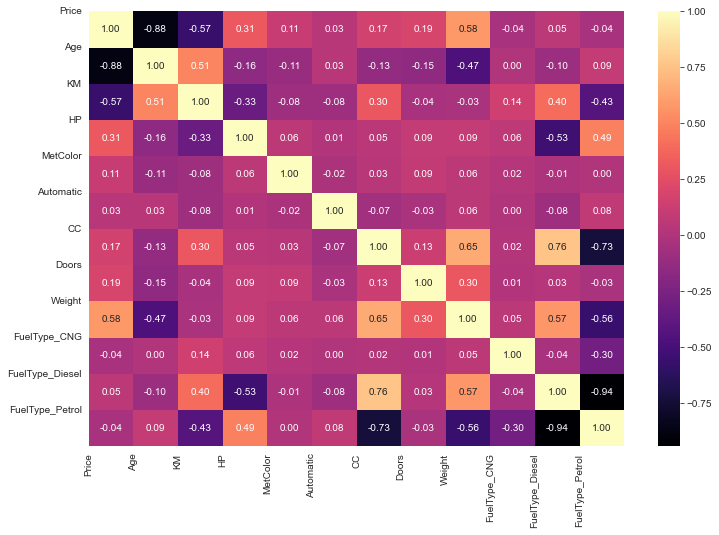

In [18]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(12, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [4]:
dataset = pd.get_dummies(dataset)

In [5]:
dataset.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


In [6]:
X = dataset.drop('Price', axis = 1).values
y = dataset.iloc[:, 0].values.reshape(-1,1)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [8]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 11)
Shape of X_test:  (359, 11)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


### 4. Regression Models <a class="anchor" id="4"></a>

#### 4.1 Linear Regression <a class="anchor" id="4.1"></a>
+ Linear regression is the simplest and most widely used statistical technique for predictive modeling. It basically gives us an equation, where we have our features as independent variables, on which our target variable [Price in our case] is dependent upon.

+ So what does the equation look like? Linear regression equation looks like this:



+ Here, we have Y as our dependent variable (Sales), X’s are the independent variables and all thetas are the coefficients. Coefficients are basically the weights assigned to the features, based on their importance. For example, if we believe that sales of an item would have higher dependency upon the type of location as compared to size of store, it means that sales in a tier 1 city would be more even if it is a smaller outlet than a tier 3 city in a bigger outlet. Therefore, coefficient of location type would be more than that of store size.

+ So, firstly let us try to understand linear regression with only one feature, i.e., only one independent variable. Therefore our equation becomes,

##### 4.1.1 The Line of Best Fit <a class="anchor" id="4.1.1"></a>
The main purpose of the best fit line is that our predicted values should be closer to our actual or the observed values, because there is no point in predicting values which are far away from the real values. In other words, we tend to minimize the difference between the values predicted by us and the observed values, and which is actually termed as error. Graphical representation of error is as shown below. These errors are also called as residuals. The residuals are indicated by the vertical lines showing the difference between the predicted and actual value.

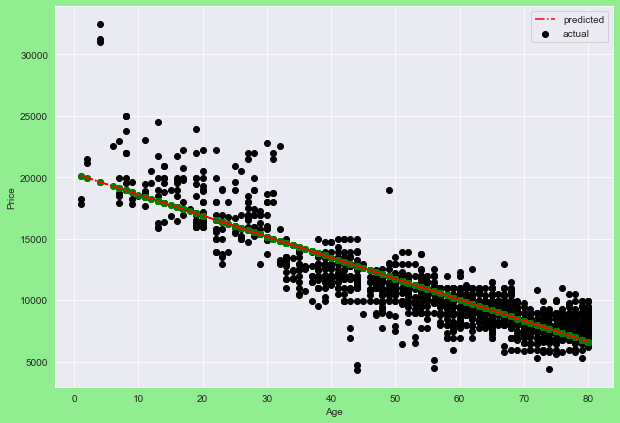

In [19]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()

x1 = dataset['Age'].values.reshape(-1,1)
y1 = dataset['Price'].values.reshape(-1,1)

reg_sklearn1 = lm1.fit(x1,y1)

plt.figure(figsize=(10,7), facecolor ='lightgreen')
plt.scatter(dataset['Age'],dataset['Price'], color = 'black', label='actual')
plt.plot(dataset['Age'], reg_sklearn1.predict(x1), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(dataset['Age'], reg_sklearn1.predict(x1), color = 'green')
plt.xlabel('Age')
plt.ylabel("Price")
plt.legend(loc='best')
plt.show()

+ Okay, now we know that our main objective is to find out the error and minimize it. But before that, let’s think of how to deal with the first part, that is, to calculate the error. We already know that error is the difference between the value predicted by us and the observed value. Let’s just consider three ways through which we can calculate error:

+ Sum of residuals (∑(Y – h(X))) – it might result in cancelling out of positive and negative errors.
+ Sum of the absolute value of residuals (∑|Y-h(X)|) – absolute value would prevent cancellation of errors
+ Sum of square of residuals ( ∑ (Y-h(X))2) – it’s the method mostly used in practice since here we penalize higher error value much more as compared to a smaller one, so that there is a significant difference between making big errors and small errors, which makes it easy to differentiate and select the best fit line.
+ Therefore, sum of squares of these residuals is denoted by:

#### 4.1.2 The cost Function <a class="anchor" id="4.1.2"></a>

So let’s say, you increased the size of a particular shop, where you predicted that the sales would be higher. But despite increasing the size, the sales in that shop did not increase that much. So the cost applied in increasing the size of the shop, gave you negative results.

So, we need to minimize these costs. Therefore we introduce a cost function, which is basically used to define and measure the error of the model.



If you look at this equation carefully, it is just similar to sum of squared errors, with just a factor of 1/2m is multiplied in order to ease mathematics.

So in order to improve our prediction, we need to minimize the cost function. For this purpose we use the gradient descent algorithm. So let us understand how it works.

#### 4.1.3 Gradient Descent <a class="anchor" id="4.1.3"></a>
Let us consider an example, we need to find the minimum value of this equation,

Y= 5x + 4x^2. In mathematics, we simple take the derivative of this equation with respect to x, simply equate it to zero. This gives us the point where this equation is minimum. Therefore substituting that value can give us the minimum value of that equation.

Gradient descent works in a similar manner. It iteratively updates Θ, to find a point where the cost function would be minimum. If you wish to study gradient descent in depth, I would highly recommend going through<iframe src="https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/" width="480" height="360" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/"><p style='color:red;font-size:14px'>this article</p></a></p>.

##### 4.1.4 Using Linear Regression for Prediction <a class="anchor" id="4.1.4"></a>
Now let us consider using Linear Regression to predict Prices for our Toyota corolla dataset problem.

Model – Enter Linear Regression:
From the previous case, we know that by using the right features would improve our accuracy. So now let us use all features to estimate Price.

Now, let us built a linear regression model in python.

In [9]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

#### 4.1.5 Evaluating your Model – R square and adjusted R- square <a class="anchor" id="4.1.5"></a>
How accurate do you think the model is? Do we have any evaluation metric, so that we can check this? Actually we have a quantity, known as R-Square.

R-Square: It determines how much of the total variation in Y (dependent variable) is explained by the variation in X (independent variable). Mathematically, it can be written as:



The value of R-square is always between 0 and 1, where 0 means that the model does not model explain any variability in the target variable (Y) and 1 meaning it explains full variability in the target variable.

Now let us check the r-square for the above model.

In [10]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8480754345159047
R2_score (train):  0.8702260786694703
R2_score (test):  0.8621869690956068
RMSE:  1398.4596051422186


In [52]:
regressor_linear.coef_

array([[-1.21164453e+02, -1.48789981e-02,  4.55824003e+01,
         1.04801739e+02,  2.36006714e+02, -3.12702199e+00,
        -3.16952768e+01,  2.31842274e+01, -1.21631013e+03,
         1.08295324e+03,  1.33356891e+02]])

In [54]:
regressor_linear.intercept_

array([-6201.92777117])

Text(0.5, 1.0, 'Residual plot')

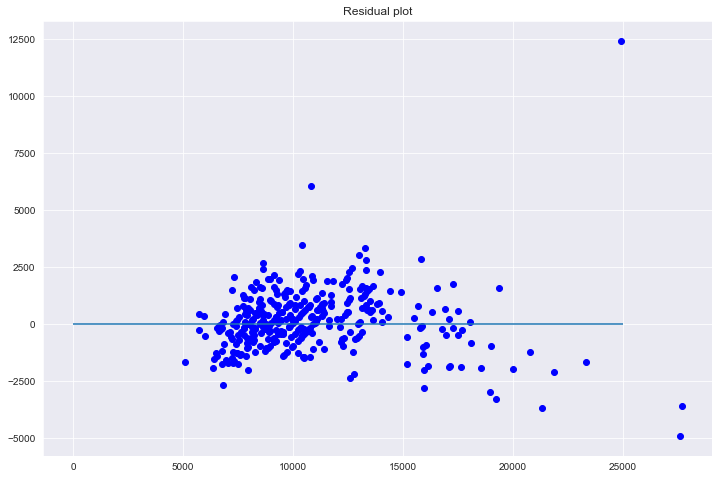

In [23]:
#Interpretation of Regression Plots
#Take a look at the residual vs fitted values plot.

#residual plot
plt.figure(figsize = (12,8))
x_plot = plt.scatter(y_pred_linear_test, (y_pred_linear_test - y_test), c='b')

plt.hlines(y=0, xmin= 0, xmax=25000)

plt.title('Residual plot')

+ We can't see a funnel like shape in the plot. This shape indicates Homoskedasticity. The presence of constant variance in the error terms results in homoskedasticity. We can clearly see that the variance of error terms(residuals) is constant.
+ Generally, non-constant variance arises in presence of outliers or extreme leverage values. These values get too much weight, thereby disproportionately influencing the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

We can easily check this by looking at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern . This indicates signs of non linearity in the data which has not been captured by the model. I would highly recommend going through <iframe src="https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/" width="480" height="360" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/"><p style='color:red;font-size:14px'>this article</p></a></p> for a detailed understanding of assumptions and interpretation of regression plots.

In order to capture this non-linear effects, we have another type of regression known as polynomial regression. So let us now understand it.

#### 4.2 Polynomial Regression <a class="anchor" id="4.2"></a>

+ Why Polynomial Regression?
+ In simple linear regression algorithm only works when the relationship between the data is linear But suppose if we have non-linear data then Linear regression will not capable to draw a best-fit line and It fails in such conditions. consider the below diagram which has a non-linear relationship and you can see the Linear regression results on it, which does not perform well means which do not comes close to reality. Hence, we introduce polynomial regression to overcome this problem, which helps identify the curvilinear relationship between independent and dependent variables.

+ How Polynomial Regression Overcomes the problem of Non-Linear data?
+ Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables we add some polynomial terms to linear regression to convert it into Polynomial regression.

+ Suppose we have X as Independent data and Y as dependent data. Before feeding data to a mode in preprocessing stage we convert the input variables into polynomial terms using some degree.

+ Consider an example my input value is 35 and the degree of a polynomial is 2 so I will find 35 power 0, 35 power 1, and 35 power 2 And this helps to interpret the non-linear relationship in data.
+ The equation of polynomial becomes something like this.


 <b>y</b> = $a_0$ + $a_1$$x_1$ + $a_2$$x_1^2$ + … + $a_n$$x_1^n$ 


+ The degree of order which to use is a Hyperparameter, and we need to choose it wisely. But using a high degree of polynomial tries to overfit the data and for smaller values of degree, the model tries to underfit so we need to find the optimum value of a degree.

+ Comparing Polynomial and simple Linear Regression Practically
+ Now we know how polynomial regression works and helps to build a model over non-linear data. Let’s compare both the algorithm practically and see the results.

+ first I will generate the data using some equation ax^2 + bx + c and then first we will apply simple linear regression to it and then we will apply polynomial regression on top the this which will make an easy comparison between the performance of both the algorithms.

+ First, we will try only with one input column and one output column and after having a brief understanding we will try it on high dimensional data. 

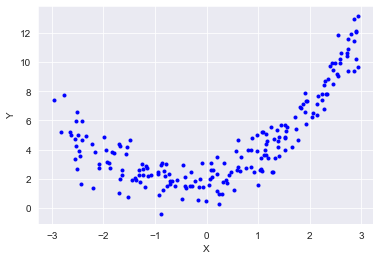

In [42]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.34804604010775186


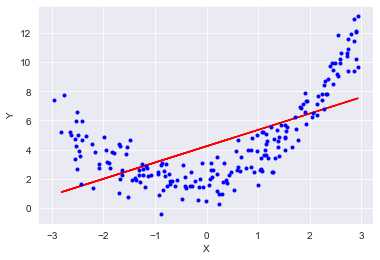

In [45]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [47]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9169947510211847


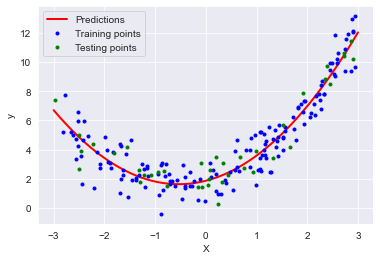

In [48]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Applying Polynomial Regression Degree-2 on the Dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

In [16]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.8480754345159047
R2_score (train):  0.9157086185582931
R2_score (test):  0.7619826280327484
RMSE:  1837.8459767688214


#### Polynomial Regression - 3rd degree

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly3 = LinearRegression()
regressor_poly3.fit(X_poly, y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly3 = cross_val_score(estimator = regressor_poly3, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly3_train = regressor_poly3.predict(poly_reg.fit_transform(X_train))
r2_score_poly3_train = r2_score(y_train, y_pred_poly3_train)

# Predicting R2 Score the Test set results
y_pred_poly3_test = regressor_poly3.predict(poly_reg.fit_transform(X_test))
r2_score_poly3_test = r2_score(y_test, y_pred_poly3_test)

# Predicting RMSE the Test set results
rmse_poly3 = (np.sqrt(mean_squared_error(y_test, y_pred_poly3_test)))
print('CV: ', cv_poly3.mean())
print('R2_score (train): ', r2_score_poly3_train)
print('R2_score (test): ', r2_score_poly3_test)
print("RMSE: ", rmse_poly3)

CV:  0.8480754345159047
R2_score (train):  0.9290089353025873
R2_score (test):  0.7216022671557795
RMSE:  1987.6395566796782


Clearly the quadratic equation fits the data better than simple linear equation. In this case, what do you think will the R-square value of quadratic regression greater than simple linear regression? Definitely yes, because quadratic regression fits the data better than linear regression. While quadratic and cubic polynomials are common, but you can also add higher degree polynomials.

Below figure shows the behavior of a polynomial equation of degree 6.

![FilterMethods](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05210231/snip13.png)

So do you think it’s always better to use higher order polynomials to fit the data set. Sadly, no. Basically, we have created a model that fits our training data well but fails to estimate the real relationship among variables beyond the training set. Therefore our model performs poorly on the test data. This problem is called as over-fitting. We also say that the model has high variance and low bias.

![FilterMethods](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05210948/overunder1.png)

Similarly, we have another problem called underfitting, it occurs when our model neither fits the training data nor generalizes on the new data.

![FilterMethods](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05211042/overunder21.png)

#### Our model is underfit when we have high bias and low variance

#### Bias and Variance in regression models
What does that bias and variance actually mean? Let us understand this by an example of archery targets.

![FilterMethods](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05153246/bias-variance.png)

Let’s say we have model which is very accurate, therefore the error of our model will be low, meaning a low bias and low variance as shown in first figure. All the data points fit within the bulls-eye. Similarly we can say that if the variance increases, the spread of our data point increases which results in less accurate prediction. And as the bias increases the error between our predicted value and the observed values increases.

Now how this bias and variance is balanced to have a perfect model? Take a look at the image below and try to understand.

![FilterMethods](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/05153332/model-complex.png)

As we add more and more parameters to our model, its complexity increases, which results in increasing variance and decreasing bias, i.e., overfitting. So we need to find out one optimum point in our model where the decrease in bias is equal to increase in variance. In practice, there is no analytical way to find this point. So how to deal with high variance or high bias?

To overcome underfitting or high bias, we can basically add new parameters to our model so that the model complexity increases, and thus reducing high bias.

Now, how can we overcome Overfitting for a regression model?

Basically there are two methods to overcome overfitting,

+ Reduce the model complexity
+ Regularization

Here we would be discussing about Regularization in detail and how to use it to make your model more generalized

### 4.3 Regularization <a class="anchor" id="4.3"></a>
You have your model ready, you have predicted your output. So why do you need to study regularization? Is it necessary?

Suppose you have taken part in a competition, and in that problem you need to predict a continuous variable. So you applied linear regression and predicted your output. Voila! You are on the leaderboard. But wait what you see is still there are many people above you on the leaderboard. But you did everything right then how is it possible?

“Everything should be made simple as possible, but not simpler – Albert Einstein”

What we did was simpler, everybody else did that, now let us look at making it simple. That is why, we will try to optimize our code with the help of regularization.

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j. How does reducing the coefficients will help us?

Let us take a look at the coefficients of feature in our above regression model.

In [68]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'Price ~ Age + KM + HP + MetColor + Automatic + CC + Doors + Weight + FuelType_CNG +FuelType_Diesel + FuelType_Petrol'
reg_results = sm.ols(f, data=dataset).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

           coef          err          varname
0   -122.014486     5.104525              Age
1     -0.016208     0.002575               KM
2     60.813281    11.290877               HP
3     57.159772   147.002632         MetColor
4    330.250940   308.163509        Automatic
5     -4.174372     1.069598               CC
6     -7.776268    78.591265            Doors
7     20.009357     2.360447           Weight
8  -2078.028589   737.487028     FuelType_CNG
9   1312.047965  1095.481604  FuelType_Diesel
10  -957.352214   514.094838  FuelType_Petrol


<AxesSubplot:title={'center':'Modal Coefficients'}, xlabel='varname'>

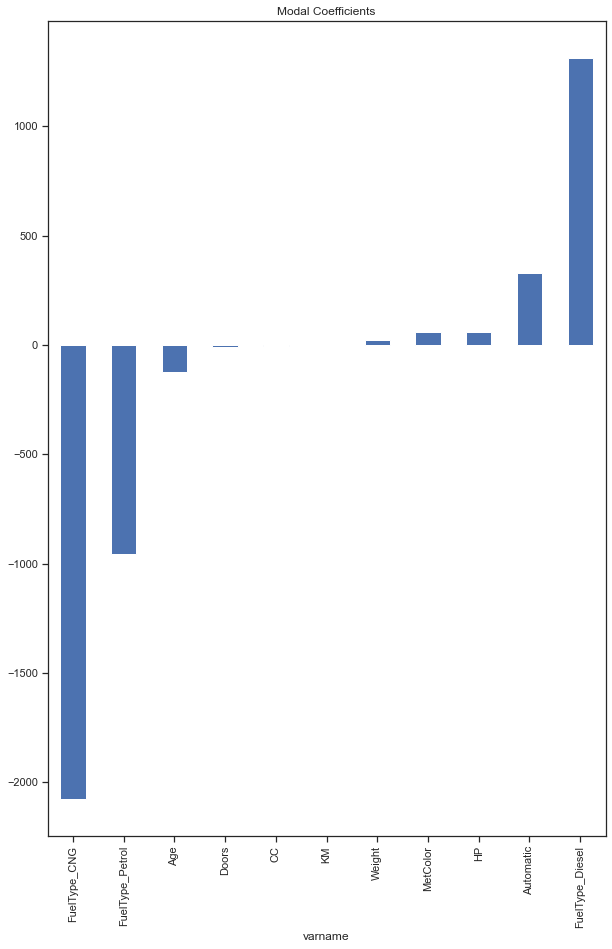

In [67]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

We can see that coefficients of FuelType_Diesel(last 1) is much higher as compared to rest of the coefficients. Therefore the total Price would be more driven by this feature.

How can we reduce the magnitude of coefficients in our model? For this purpose, we have different types of regression techniques which uses regularization to overcome this problem. So let us discuss them.

### 4.3.1 Ridge Regression <a class="anchor" id="4.3.1"></a>
Let us first implement it on our above problem and check our results that whether it performs better than our linear regression model.

In [107]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.05, normalize=True)

In [104]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=10, normalize=True)

ridgeReg.fit(X_train,y_train)

Ridge(alpha=10, normalize=True)

In [108]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8510979747227825
R2_score (train):  0.8685442167778668
R2_score (test):  0.8581839936508988
RMSE:  1418.6243487466363


+ Note that value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.

Here we have consider alpha = 0.05. But let us consider different values of alpha and plot the coefficients for each case.

In [110]:
ridgeReg.coef_.flatten()

array([-1.14866658e+02, -1.67775417e-02,  3.43438241e+01,  1.13996671e+02,
        1.95154184e+02, -1.76813473e+00, -1.99271200e+01,  2.26389471e+01,
       -1.22794158e+03,  1.77254036e+02, -1.96079857e+01])

In [109]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataset.columns.values[1:]
                       })
print(coef_df)

           coef          varname
0   -114.866658              Age
1     -0.016778               KM
2     34.343824               HP
3    113.996671         MetColor
4    195.154184        Automatic
5     -1.768135               CC
6    -19.927120            Doors
7     22.638947           Weight
8  -1227.941585     FuelType_CNG
9    177.254036  FuelType_Diesel
10   -19.607986  FuelType_Petrol


<AxesSubplot:title={'center':'alpha = 0.05'}, xlabel='varname'>

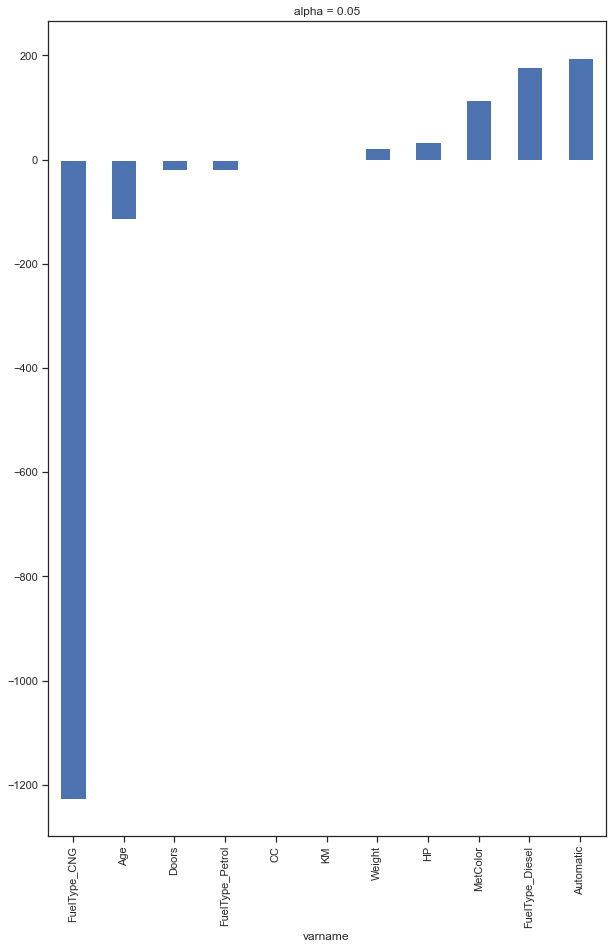

In [95]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<AxesSubplot:title={'center':'alpha = 0.5'}, xlabel='varname'>

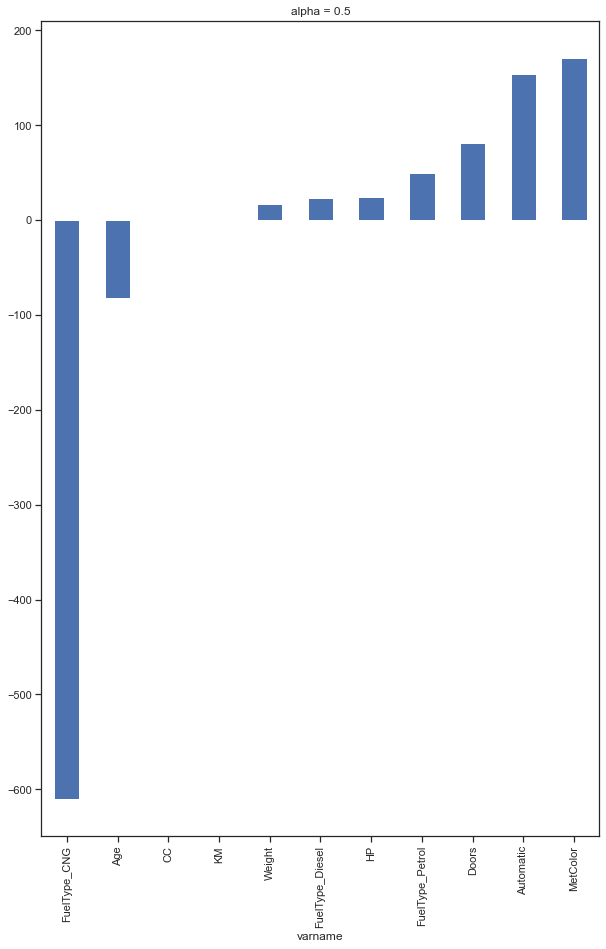

In [100]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

<AxesSubplot:title={'center':'alpha = 5'}, xlabel='varname'>

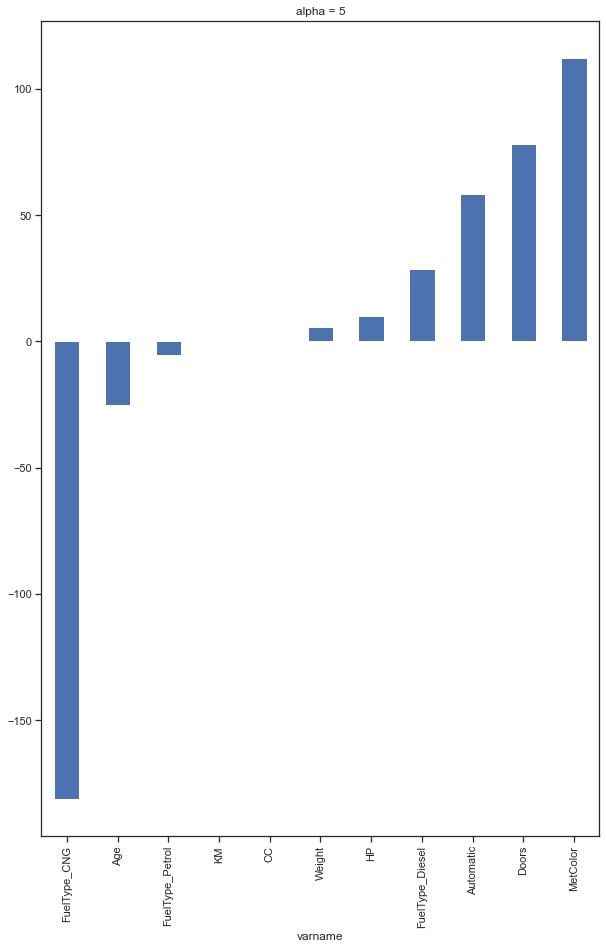

In [103]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5')

<AxesSubplot:title={'center':'alpha = 10'}, xlabel='varname'>

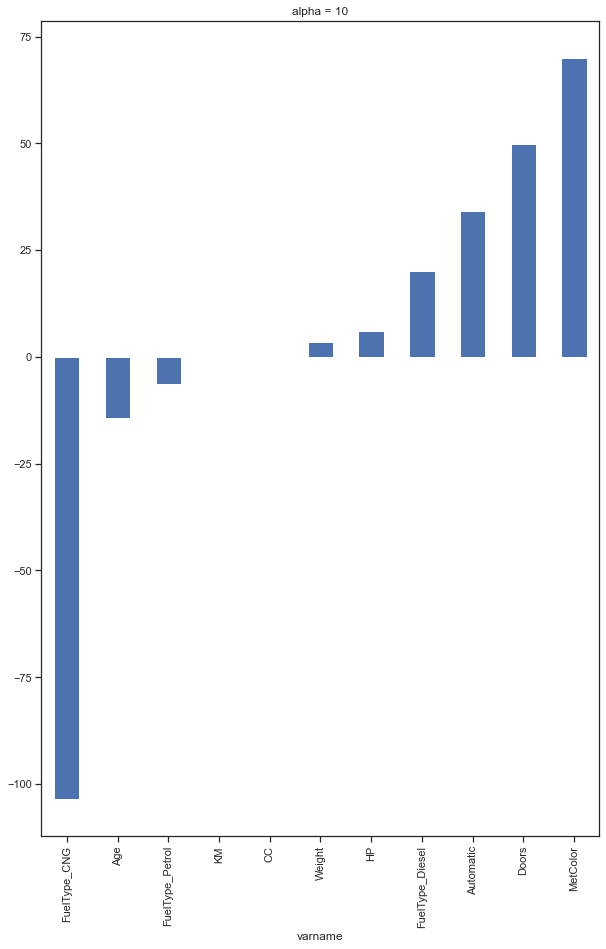

In [106]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10')

You can see that, as we increase the value of alpha, the magnitude of the coefficients decreases.

But if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha=0.05. So we have to choose it wisely by iterating it through a range of values and using the one which gives us lowest error.

In [129]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=200, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=200))])

In [130]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8775597283058663
R2_score (train):  0.8977911762225406
R2_score (test):  0.8861612304709072
RMSE:  1271.0126720496105


#### Important Points:
It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

It reduces the model complexity by coefficient shrinkage.

It uses L2 regularization technique. (which I will discussed later)

Now let us consider another type of regression technique which also makes use of regularization

### 4.3.2 Lasso regression <a class="anchor" id="4.3.2"></a>
LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge, but lets understand the difference them by implementing it in our toyota dataset.

In [33]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

In [34]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.8483989123092069
R2_score (train):  0.8702096230134423
R2_score (test):  0.8614652654050468
RMSE:  1402.1165726698453


Again lets change the value of alpha and see how does it affect the coefficients.

In [35]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataset.columns.values[1:]
                       })
print(coef_df)

           coef          varname
0   -121.196375              Age
1     -0.014870               KM
2     43.421215               HP
3    100.602381         MetColor
4    221.946637        Automatic
5     -2.916348               CC
6    -32.714635            Doors
7     23.305324           Weight
8  -1345.261772     FuelType_CNG
9    778.379891  FuelType_Diesel
10    -0.000000  FuelType_Petrol


<AxesSubplot:title={'center':'alpha = 0.5'}, xlabel='varname'>

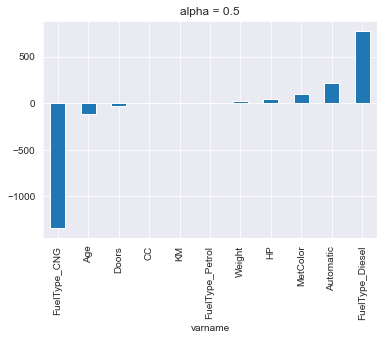

In [28]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<AxesSubplot:title={'center':'alpha = 0.05'}, xlabel='varname'>

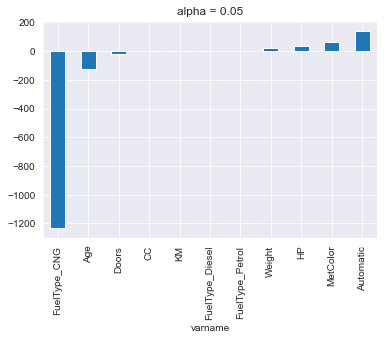

In [32]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

So, we can see that even at small values of alpha, the magnitude of coefficients have reduced a lot. By looking at the plots, can you figure a difference between ridge and lasso?

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes. Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

In [64]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=2.36, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('poly', PolynomialFeatures(degree=3)),
                ('model', Lasso(alpha=2.36, max_iter=2000, tol=0.0199))])

In [65]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.742771262010789
R2_score (train):  0.9273633923675705
R2_score (test):  0.9022945020939637
RMSE:  1177.5091354603408
